<h1>  How to handle FITS Data

<br> <br>
 - ## What is FITS format ?
***

Flexible Image Transport System (FITS) is a standard format for exchanging astronomical data between institutions, independent of the hardware platform and software environment. A data file in FITS format consists of a series of Header Data Units (HDUs), each containing two components: an ASCII text header and the binary data. The header contains a series of header keywords that describe the data in a particular HDU and the data component immediately follows the header.

The first header in a FITS file is known as the primary header, and any number of extensions can follow the primary HDU. The data unit following the primary header must contain either an image or no data at all, but each extension can contain one of several different data types, including images, binary tables, and ASCII text tables. The value of the XTENSION keyword in the extension's header identifies the type of data the extension contains. Figure below schematically illustrates the structure of a FITS file and its extensions.

<img src="https://www.stsci.edu/instruments/wfpc2/Wfpc2_dhb/images/intro_ch2a.gif" alt="FITS File Structure" title ="FITS File Structure" />

<h2> 1. Importing required libraries

In [23]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

<h2>2. Reading FITS Data

In [25]:
# Opening the FITS file 

hdul = fits.open('/home/space2023/Downloads/ADP.2014-12-12T08_29_23.153.fits')

# Opening another FITS file

hdul_2 = fits.open('/home/space2023/Downloads/ADP.2014-07-11T10_00_58.963.fits')

# hdul.info() summarizes the content of the opened FITS file:
    
hdul.info()
print()
hdul_2.info()
=

data = hdul[1].data[0]

data_2 = hdul_2[1].data[0]
#print(hdul_2[1].data) 
#print(data)

Filename: /home/space2023/Downloads/ADP.2014-12-12T08_29_23.153.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1238   ()      
  1  SPECTRUM      1 BinTableHDU     41   1R x 3C   [606E, 606E, 606E]   

Filename: /home/space2023/Downloads/ADP.2014-07-11T10_00_58.963.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      78   ()      
  1  SPECTRAL CONTAINER    1 BinTableHDU     42   1R x 3C   [1182E, 1182E, 1182E]   


In [13]:
hdul_2[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                14184 / length of dimension 1                          
NAXIS2  =                    1 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    3 / number of table fields                         
TTYPE1  = 'WAVE    '                                                            
TFORM1  = '1182E   '                                                            
EXTNAME = 'SPECTRAL CONTAINER' / FITS exstension name                           
DATASUM = '760744017'          / data unit checksum updated 2014-07-09T09:25:31 
TUNIT1  = 'Angstrom'        

In [14]:

column_1 = hdul_2[1].columns[0]
column_2 = hdul_2[1].columns[1]
column_3 = hdul_2[1].columns[2]
#first_two_rows = data[:0]

#exposure = time[-1] - time[0]
#print('\n Exposure (in sec)',exposure)

#timeres = np.round(time[1] - time[0],3)
#print('\n Time Resolution (in sec)',timeres)
print("Column_1: ", column_1)
print("Column_2: ", column_2)
print("Column_3: ", column_3)

Column_1:  name = 'WAVE'; format = '1182E'; unit = 'Angstrom'
Column_2:  name = 'FLUX_REDUCED'; format = '1182E'; unit = '10**(-16) erg/cm**2/s/Angstrom'
Column_3:  name = 'ERR'; format = '1182E'; unit = '10**(-16) erg/cm**2/s/Angstrom'


In [22]:
len(data[2])

606

(7000.0, 8000.0)

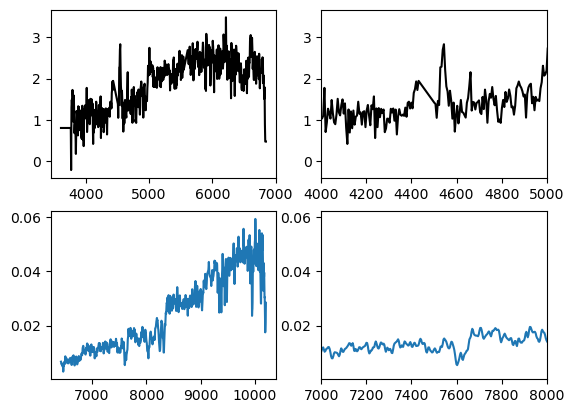

In [22]:
plt.subplot(2,2,1)
plt.plot(data[0],data[1],color = 'black')

plt.subplot(2,2,2)
plt.plot(data[0],data[1],'k')
plt.xlim(4000,5000)

plt.subplot(2,2,3)
plt.plot(data_2[0],data_2[1])

plt.subplot(2,2,4)
plt.plot(data_2[0],data_2[1])
plt.xlim(7000,8000)

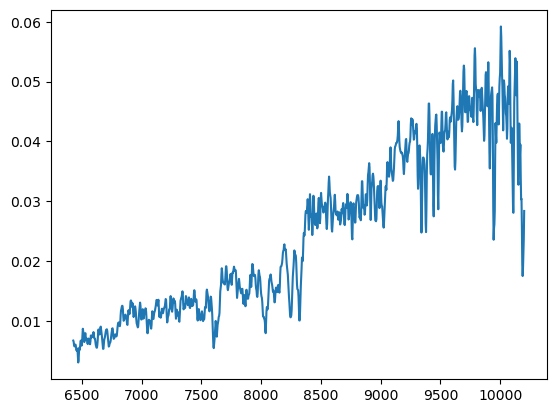

In [15]:
plt.plot(data_2[0],data_2[1])